In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_excel('/kaggle/input/laptops/laptops.xlsx')
ins = pd.read_csv('/kaggle/input/insurance/insurance(in).csv')
df.head(205)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance(in).csv
/kaggle/input/laptops/laptops.xlsx


,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0 / 5
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,3.3 / 5
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0 / 5
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0 / 5
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0 / 5
...,...,...,...,...,...,...,...,...,...
200,Lenovo,IdeaPad 320-15IKBRN,15.6,Intel Core i5-8250U,Intel GMA HD,1 TB HDD,2099.0,2099.0,3.8 / 5
201,Huawei,MateBook D,15.6,Intel Core i7-8550U,NVIDIA GeForce MX150 (2 GB),128 GB SSD/1 TB HDD,3299.0,3299.0,4.0 / 5
202,Apple,MacBook Pro (Retina + Touch Bar),15.4,Intel Core i7 6 Core,Radeon Pro 555X GDDR5 (4 GB),256 GB SSD,10199.0,10199.0,0 / 5
203,Apple,MacBook Pro (Retina + Touch Bar),15.4,Intel Core i7 6 Core,Radeon Pro 560X GDDR5 (4 GB),512 GB SSD,11899.0,11899.0,4.4 / 5


# Scenario 1

In [2]:
df['ratings_5max'] = (df['ratings_5max'].str.split('/').str[0].astype(float))
by_rating = df.sort_values(by='ratings_5max',ascending=False)
by_rating.head(20)

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
166,HP,15-da0007nx,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1779.0,1779.0,5.0
26,HP,Pavilion 14-ce0000nx,14.0,Intel Core i7-8550U,NVIDIA GeForce MX150 (4 GB),256 GB M.2 SSD/1 TB HDD,3599.0,4199.0,5.0
146,Apple,MacBook,12.0,Intel Core M3,Intel HD Graphics 615,256 GB SSD,4669.0,5669.0,5.0
65,HP,14-cf1001nx,14.0,Intel Core i5-8265U,AMD Radeon 530 (2 GB),128 GB M.2 SSD/1 TB HDD,2549.0,2799.0,5.0
163,HP,14-bp101nx,14.0,Intel Core i5-8250U,AMD Radeon 530 (2 GB),1 TB HDD,2519.0,2519.0,5.0
159,Asus,VivoBook 15 X540UA,15.6,Intel Core i5-8250U,Intel HD Graphics 620,1 TB HDD,1599.0,1899.0,5.0
42,Apple,MacBook,12.0,Intel Core M3,Intel HD Graphics 615,256 GB SSD,5269.0,5669.0,5.0
107,Apple,MacBook Pro (Retina),13.3,Intel Core i5 Dual Core,Intel Iris Plus Graphics 640,128 GB SSD,5669.0,5669.0,4.9
118,Apple,MacBook Pro (Retina),13.3,Intel Core i5 Dual Core,Intel Iris Plus Graphics 640,256 GB SSD,6499.0,6499.0,4.6
156,Apple,MacBook Pro (Retina),13.3,Intel Core i5 Dual Core,Intel Iris Plus Graphics 640,128 GB SSD,5269.0,5669.0,4.6


Created a new dataframe, but sorted all laptops in descending order using the rating, which I converted to whole numbers rather than fractions. I did this to make the data set easier to wokr with.

**Task 2 was to determine the number of unique manufacturers in this case, brands**

In [3]:
unique_brands = df['brand'].nunique()
print(f'the number of unique laptop manufacturers are {unique_brands}')

the number of unique laptop manufacturers are 9


I decided to use the nunique function, which returns the number of unique elements for a column, 9 in this case. So this tells us that there are 9 unique manufacturers.

**Task 3, Identify the highest and lowest priced laptops and their prices**

In [4]:
highest = df.loc[df['discount_price'].idxmax()]
highest_name = highest['laptop_name']
highest_price = highest['discount_price']

lowest = df.loc[df['discount_price'].idxmin()]
lowest_name = lowest['laptop_name']
lowest_price = lowest['discount_price']

print(f'the highest priced laptop is {highest_name} at {highest_price}')
print(f'the lowest priced laptop is {lowest_name} at{lowest_price}')

the highest priced laptop is MacBook Pro (Retina + Touch Bar) at 12499.0
the lowest priced laptop is IdeaPad S130-14IGM at899.0


I used the idmax() and idmin() functions, both return the index of the specific lowest in icount price, assuming the coursework wants to know the lowest and highest prices before discount. We use the .loc to locate those prices in the dataframe and then store them in a variable, where we could use the selection brackets to find the specific data we want

**Task 4: Analyse how laptop prices are spread across the dataset**

In [5]:
df['discount_price'].describe()

count      205.000000
mean      3812.550976
std       2308.702005
min        899.000000
25%       2099.000000
50%       3149.000000
75%       4939.000000
max      12499.000000
Name: discount_price, dtype: float64

This shows the overall data distribution of the discounted prices

In [6]:
df['old_price'].describe()

count      205.000000
mean      4040.355854
std       2327.147396
min        999.000000
25%       2249.000000
50%       3299.000000
75%       5649.000000
max      12499.000000
Name: old_price, dtype: float64

This shows the overall data distribution of the old prices.

**Task 5: Find the smallest, largest and average screen size**


In [7]:
largest_screen = df.loc[df['display_size'].idxmax()]
smallest_screen = df.loc[df['display_size'].idxmin()]
avg_screen = df['display_size'].mean()
print(f"the largest display = {largest_screen['display_size']} "f"and the smallest = {smallest_screen['display_size']}.")
print(f'the average screen diaplay is {avg_screen:.2f}')

the largest display = 18.4 and the smallest = 12.0.
the average screen diaplay is 14.58


**Task 6: Calculate the average price of laptops for each brand**1. 

In [8]:
avg_p_brand = df.groupby('brand')['discount_price'].mean().round(2)
print(avg_p_brand)

brand
Acer         2515.58
Apple        6802.02
Asus         2972.64
Dell         3782.91
HP           3226.92
Huawei       3615.67
Lenovo       1998.13
MSI          9071.00
Microsoft    5132.33
Name: discount_price, dtype: float64


I used the group_by function and parsed the brand as the parameter, then old prices as the associated column in the dataset, and found the mean. I then rounded it to 2 sf for more readability.

**Task 7: Determine the average laptop price and customer rating for each
brand**

In [9]:
avg_by_brand = df.groupby('brand').agg(avg_price =('discount_price','mean'),avg_rating = ('ratings_5max', 'mean')).round(2)
print(avg_by_brand)

           avg_price  avg_rating
brand                           
Acer         2515.58        0.95
Apple        6802.02        2.28
Asus         2972.64        0.59
Dell         3782.91        1.17
HP           3226.92        1.06
Huawei       3615.67        2.43
Lenovo       1998.13        2.17
MSI          9071.00        0.00
Microsoft    5132.33        1.37


In this segment, we had to use an aggregate function because the group by alone can only group 1 value to another.

**8:Find out how many laptops are being sold at a discounted pric**

In [10]:
difference  = (df['old_price']!=df['discount_price']).sum()
print(difference)

101


Here we could determine that 101 laptops are being sold at a discount because all we did was to check how many places in the old price column and discount price column that we had two different values.

**9: Investigate how storage capacity disk space relates to price.** 

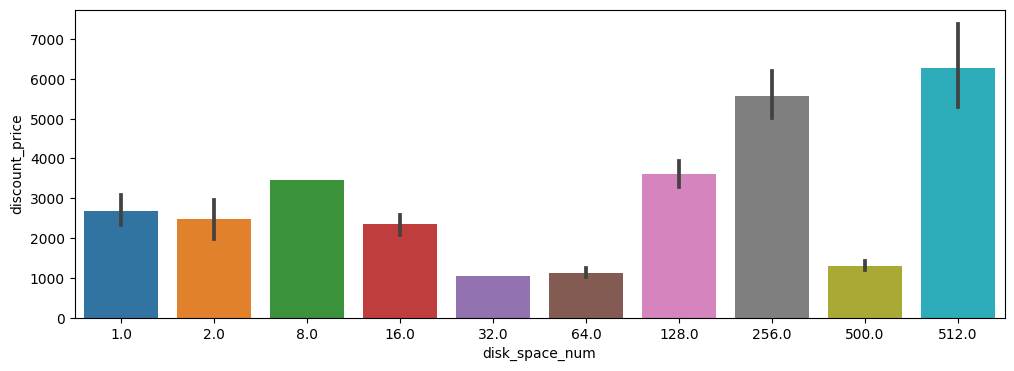

In [11]:
plot_df = df.copy()
plot_df['disk_space_num'] = (plot_df['disk_space'].astype(str).str.extract(r'(\d+)').astype(float))
plt.figure(figsize=(12, 4))
sns.barplot(data=plot_df, x='disk_space_num', y='discount_price')
plt.show()

From the bar chart I was able to render, we could see that although storage spaces like 512GB and 256GB are smaller, they tend to be more expensive than 1 TB and 2 TB even though they have higher storage capacity. This is because the 256 and 512 are usually paired with a 1 TB HDD drive, and the 256 and 512 are SSD, making them even more expensive.

**10: Explore whether screen size has any meaningful correlation with laptop
price.**

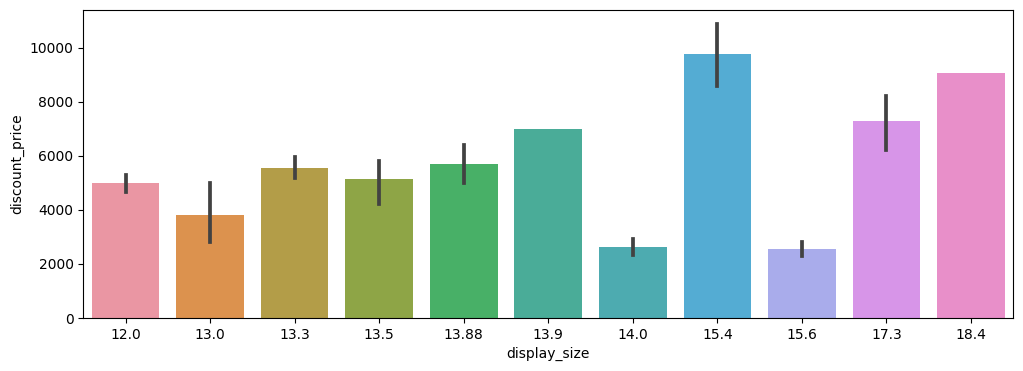

In [12]:
plot_df = df.copy()
plt.figure(figsize=(12, 4))
sns.barplot(data=plot_df, x='display_size', y='discount_price')
plt.show()

we can see that the higher the display, the higher the cost of the laptop, with 14.0 and 15.6 being the anomalies.

# Scenario 2

**1: Examine the distribution of individuals by age group**

In [13]:
ins.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


[]

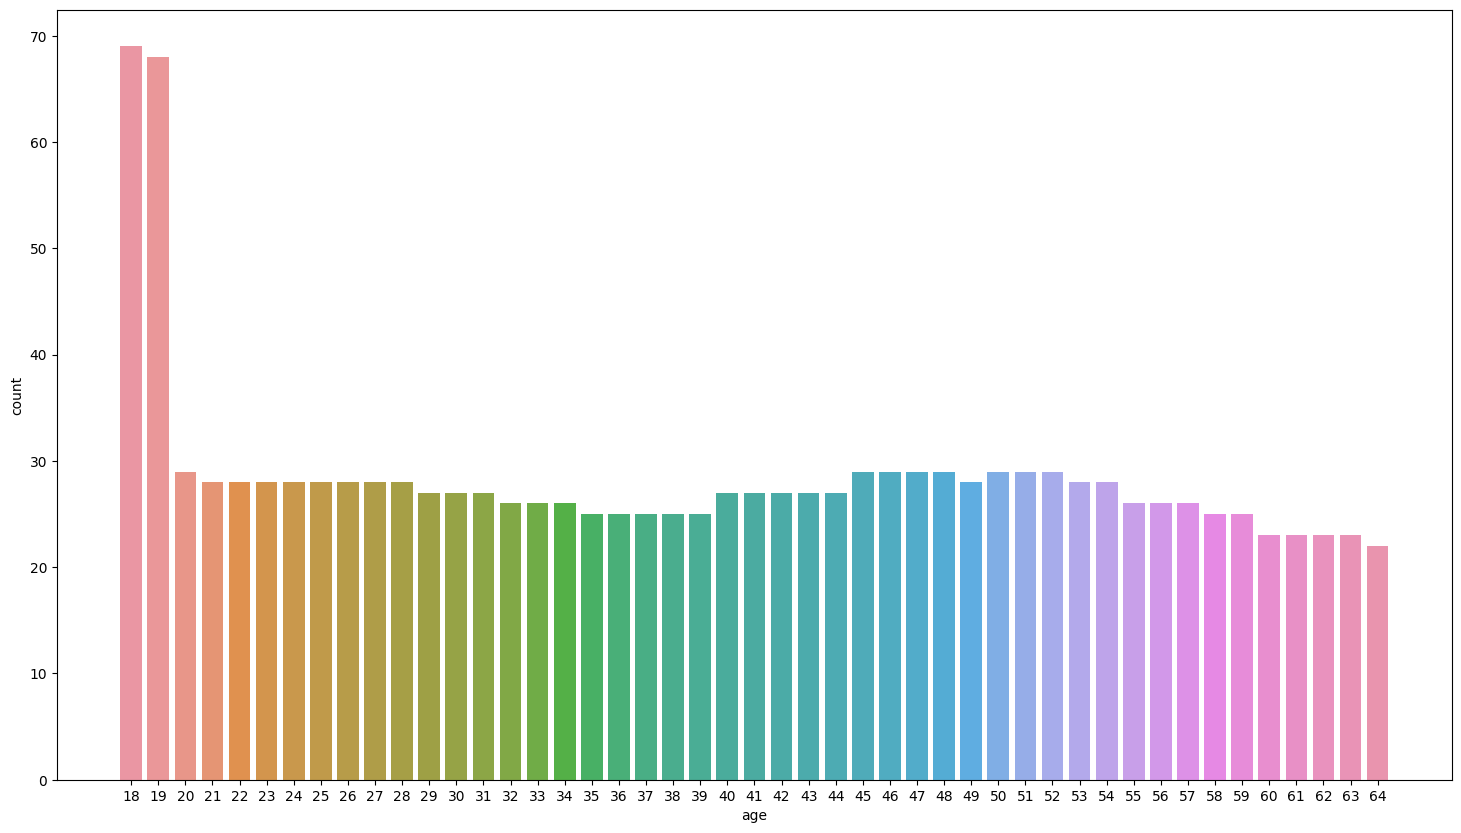

In [14]:
plt.figure(figsize=(18,10))
sns.countplot(data = ins, x ='age')
plt.plot()

From the plot rendered, we can see that the most prominent ages in the dataset is 18 and 19, showing that this organisation has a lot of very young adults being provided insurance.

**2: Analyse the spread and range of healthcare charges.**

In [15]:
spread  = ins['charges'].std()
print(f'in order to compute the spread we would have to find the standard deviation of the charges column using the.std() function and we get {spread:.2f} for this datset')
range_charge = ins['charges'].max() - ins['charges'].min()
print(f' and the range is {range_charge:.2f}')

in order to compute the spread we would have to find the standard deviation of the charges column using the.std() function and we get 12110.01 for this datset
 and the range is 62648.55


**3: Organise the BMI values into categories (bins)**

In [16]:
ins['bmi_category'] = pd.cut(ins['bmi'],bins=[0, 18.5, 25, 30, np.inf],labels=['Underweight', 'Healthy Weight', 'Overweight', 'Obese'],include_lowest=True,right=False)
ins.head(5)

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


As you can see here, we were able to make a column to categorise the BMI based on Google research and available data in the column, grouping them into underweight, healthy, overweight, and obese.

**4:Identify which region has the greatest proportion of individuals
classified as obese**

In [17]:
obese_patients = ins[ins['bmi_category'] == 'Obese']
obese_counts = obese_patients['region'].value_counts()
obese_counts.idxmax()

'southeast'

From the result, we can see the region with the most obesity. We found this by finding the obese individuals in bmi_category and then find the number of regions and identifying the region with most appearance using idmax() in that column

**5:Explore how a person’s age influences their medical expenses.**

[]

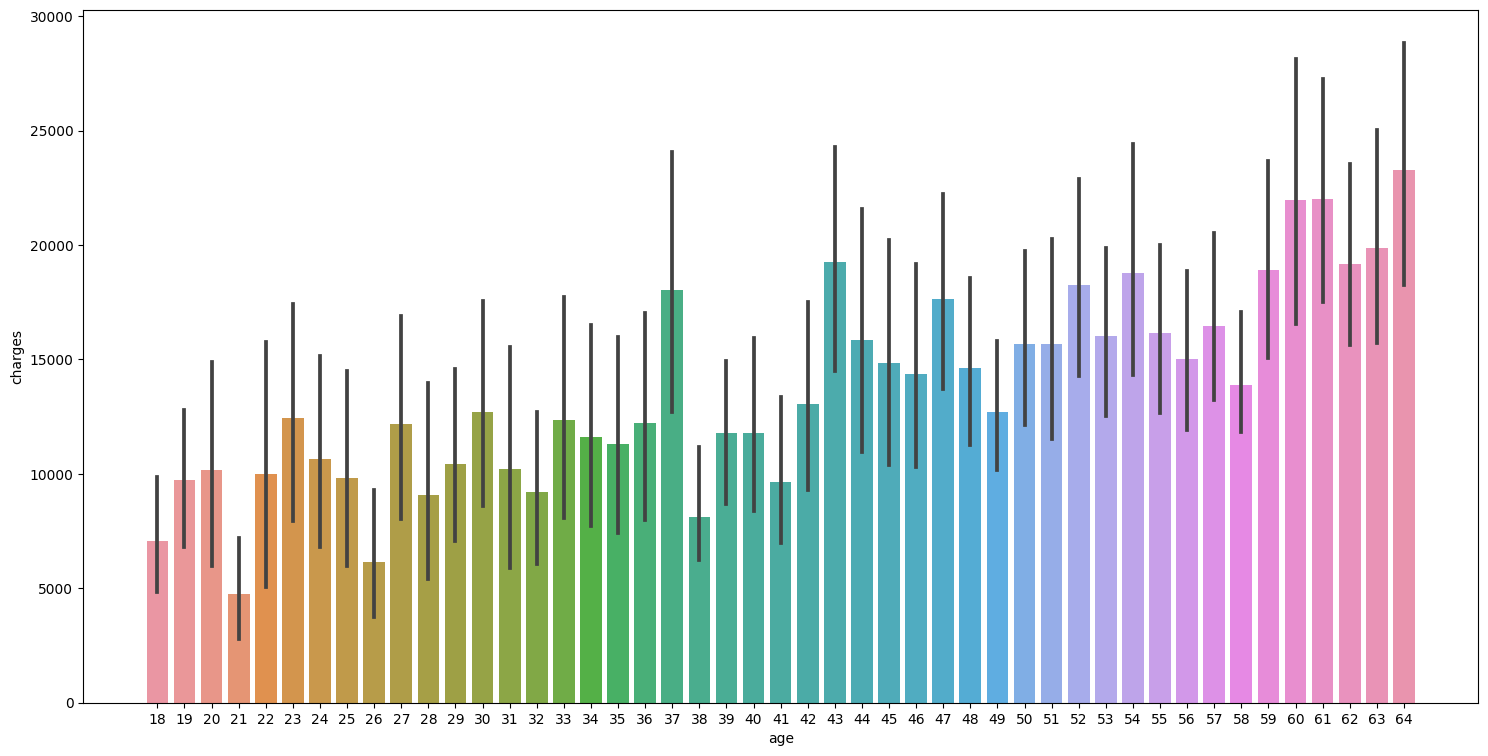

In [18]:
plt.figure(figsize=(18,9))
sns.barplot(data = ins, x ='age', y ='charges')
plt.plot()

From the box plot I was able to render, I would say that as the average age increases, the more they tend to be charged for their insurance. this is a slight correlation.

**6: Investigate the relationship between the number of dependants and
healthcare costs**

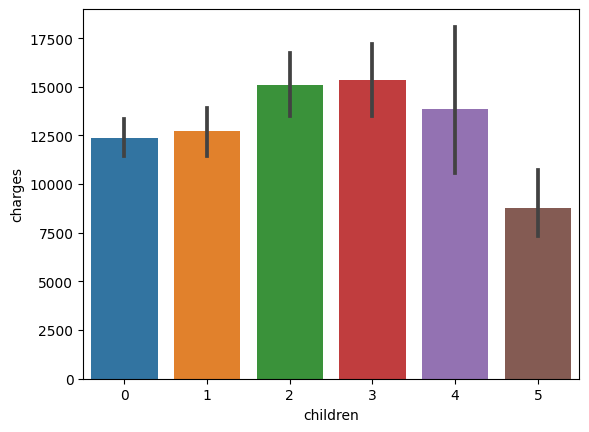

In [19]:
sns.barplot(data=ins, x='children', y='charges')
plt.show()

From the data there is a slight correlation between the number of dependants and charges, as the number of children rises we can see the average charges for that person rise slightly; however, the average price of people with 5 children is significantly the lowest. From this observation we cannot make a clear relationship between the 2.

**7: Determine how medical charges vary with BMI levels**

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[]

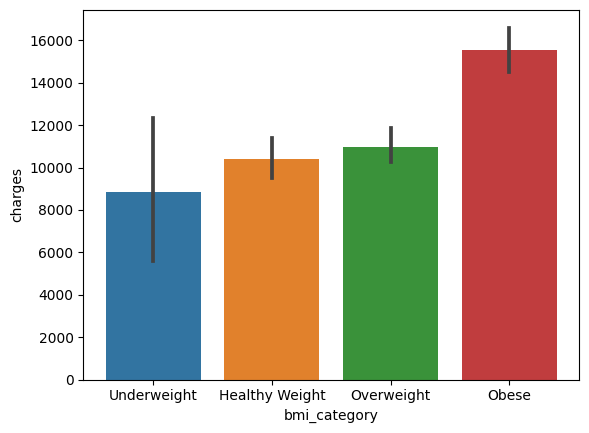

In [20]:
sns.barplot(data=ins, x='bmi_category', y='charges')
plt.plot()

From the barplot there is a clear correlation between BMI and charges for the person. The average charge increases as the person's BMI increases.

**8: Assess the connection between smoking status and medical costs.**

[]

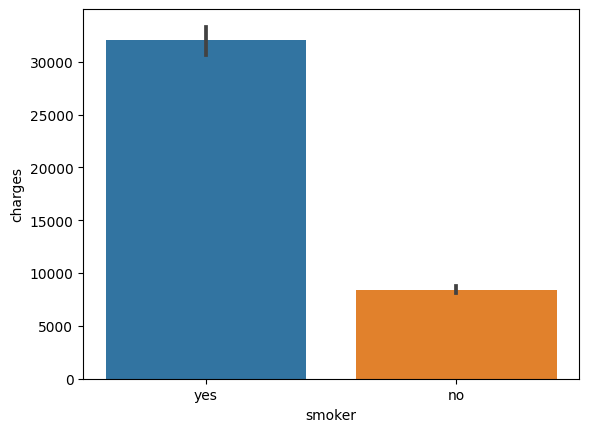

In [21]:
sns.barplot(data=ins, x='smoker', y='charges')
plt.plot()

From the barchart there is an obvious relationship between smoking and charges; the more you smoke, the higher the charges you face. The difference between smokers' charges and non-smokers' charges is significant and is a clear identifier.

9: Compare healthcare charges across different regions.

[]

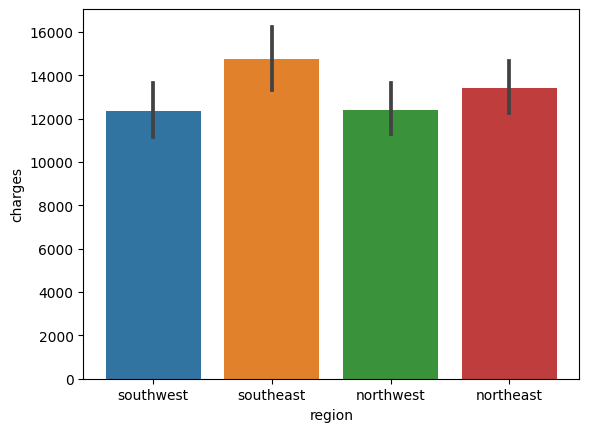

In [22]:
sns.barplot(data=ins, x='region', y='charges')
plt.plot()

From the render we can see that the southeast has the highest average charges, followed by the northeast, and then the northwest and southwest have around the same average price. indicating that patients from the southeast would tend to pay more for insurance.